# PBS 

In [1]:
# Import packages.
import analysis_functions as af
import allel
import numpy as np
import pandas as pd
# Print version numbers.
print('allel', allel.__version__)
print('numpy', np.__version__)
print('pandas', pd.__version__)

allel 1.3.5
numpy 1.22.3
pandas 1.4.2


In [2]:
# Intialize the numpy warning preferences.
np.seterr(invalid='ignore')
# Intialize the pandas preferences.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Import the TGP meta data.
tgp_mod_df = pd.read_csv(
    '../meta_data/tgp_mod.txt', sep='\t',
    names=['IND', 'POP', 'SUPERPOP'],
)
# Intialize a super population list.
tgp_superpop_list = ['AFR', 'SAS', 'EAS', 'EUR', 'AMR']
# Intialize an ordered population list.
tgp_pop_list = [
    'LWK', 'GWD', 'MSL', 'ESN', 'YRI', # AFR.
    'BEB', 'STU', 'ITU', 'PJL', 'GIH', # SAS.
    'CHB', 'KHV', 'CHS', 'JPT', 'CDX', # EAS.    
    'TSI', 'CEU', 'IBS', 'GBR', 'FIN', # EUR.
    'PEL', 'MXL', 'CLM', 'PUR', # AMR.
]
# Define an OOA population list.
ooa_pop_list = [
    'PEL', 'MXL', 'CLM', 'PUR',
    'CHB', 'KHV', 'CHS', 'JPT', 'CDX',
    'TSI', 'CEU', 'IBS', 'GBR', 'FIN',
    'BEB', 'STU', 'ITU', 'PJL', 'GIH',
]
# Intialize a list of archaics.
arc_list = ['DEN', 'ALT', 'CHA', 'VIN']
# Intialize a samples dictionary.
idx_dicc = {
    'DEN': np.array([2350]), 'ALT': np.array([2347]),
    'CHA': np.array([2348]), 'VIN': np.array([2349]),
    
}
# For every super population...
for superpop in tgp_superpop_list:
    # Fill the sample dictionary.
    idx_dicc[superpop] = tgp_mod_df[tgp_mod_df['SUPERPOP'] == superpop].index.values
# For every population...
for pop in tgp_pop_list:
    # Fill the sample dictionary.
    idx_dicc[pop] = tgp_mod_df[tgp_mod_df['POP'] == pop].index.values
# Append the OOA superpopulations.
idx_dicc['OOA'] = tgp_mod_df[tgp_mod_df['SUPERPOP'] != 'AFR'].index.values
# Intialize a dictionary to store all sample indicies.
pbs_idx_dicc = {
    'MXL_NAT': np.loadtxt('../meta_data/mxl_nat_idx.csv', delimiter=',', dtype=int),
    'MXL_NOT': np.loadtxt('../meta_data/mxl_not_idx.csv', delimiter=',', dtype=int),
    'MXL': tgp_mod_df[tgp_mod_df['POP'] == 'MXL'].index.values,
    'CEU': tgp_mod_df[tgp_mod_df['POP'] == 'CEU'].index.values,
    'CHB': tgp_mod_df[tgp_mod_df['POP'] == 'CHB'].index.values,
}

## 748kb Region

In [4]:
# Import the genotype matrix.
tgp_748kb_gt, tgp_748kb_pos = af.load_hap_region('tgp_mod_arc_anc', 12, 40269000, 41017000)

In [5]:
# Load the PBS values for every SNP.
mxl_pop_pbs_genome = af.load_pbs_chromosomes('pop')
mxl_nat_pbs_genome = af.load_pbs_chromosomes('nat')
mxl_not_pbs_genome = af.load_pbs_chromosomes('not')

In [6]:
# Compute the observed PBS values for the 748kb region.
mxl_pop_pbs, mxl_avg_pbs = af.calc_pbs(
    tgp_748kb_gt, pbs_idx_dicc['MXL'],
    pbs_idx_dicc['CHB'], pbs_idx_dicc['CEU'],
)
mxl_nat_pbs, _ = af.calc_pbs(
    tgp_748kb_gt, pbs_idx_dicc['MXL_NAT'],
    pbs_idx_dicc['CHB'], pbs_idx_dicc['CEU'],
)
mxl_not_pbs, _ = af.calc_pbs(
    tgp_748kb_gt, pbs_idx_dicc['MXL_NOT'],
    pbs_idx_dicc['CHB'], pbs_idx_dicc['CEU'],
)

In [7]:
# Print a summary of the significance thresholds.
print('All MXL Inds.: ', np.nanpercentile(mxl_pop_pbs_genome, 99))
print('Indigenous American Anc. Inds.: ', np.nanpercentile(mxl_nat_pbs_genome, 99))
print('Non-Indigenous American Anc. Inds.: ', np.nanpercentile(mxl_not_pbs_genome, 99))

All MXL Inds.:  0.1408079128199867
Indigenous American Anc. Inds.:  0.24632227413465443
Non-Indigenous American Anc. Inds.:  0.110287522862565


In [8]:
# For the population results determine the proportion of SNPs above the significance threshold.
n_sig = (mxl_pop_pbs > np.nanpercentile(mxl_pop_pbs_genome, 99)).sum()
total = np.sum(~np.isnan(mxl_pop_pbs))
print(f'{n_sig} out of {total} SNPs are above the significance threshold')

375 out of 2043 SNPs are above the significance threshold


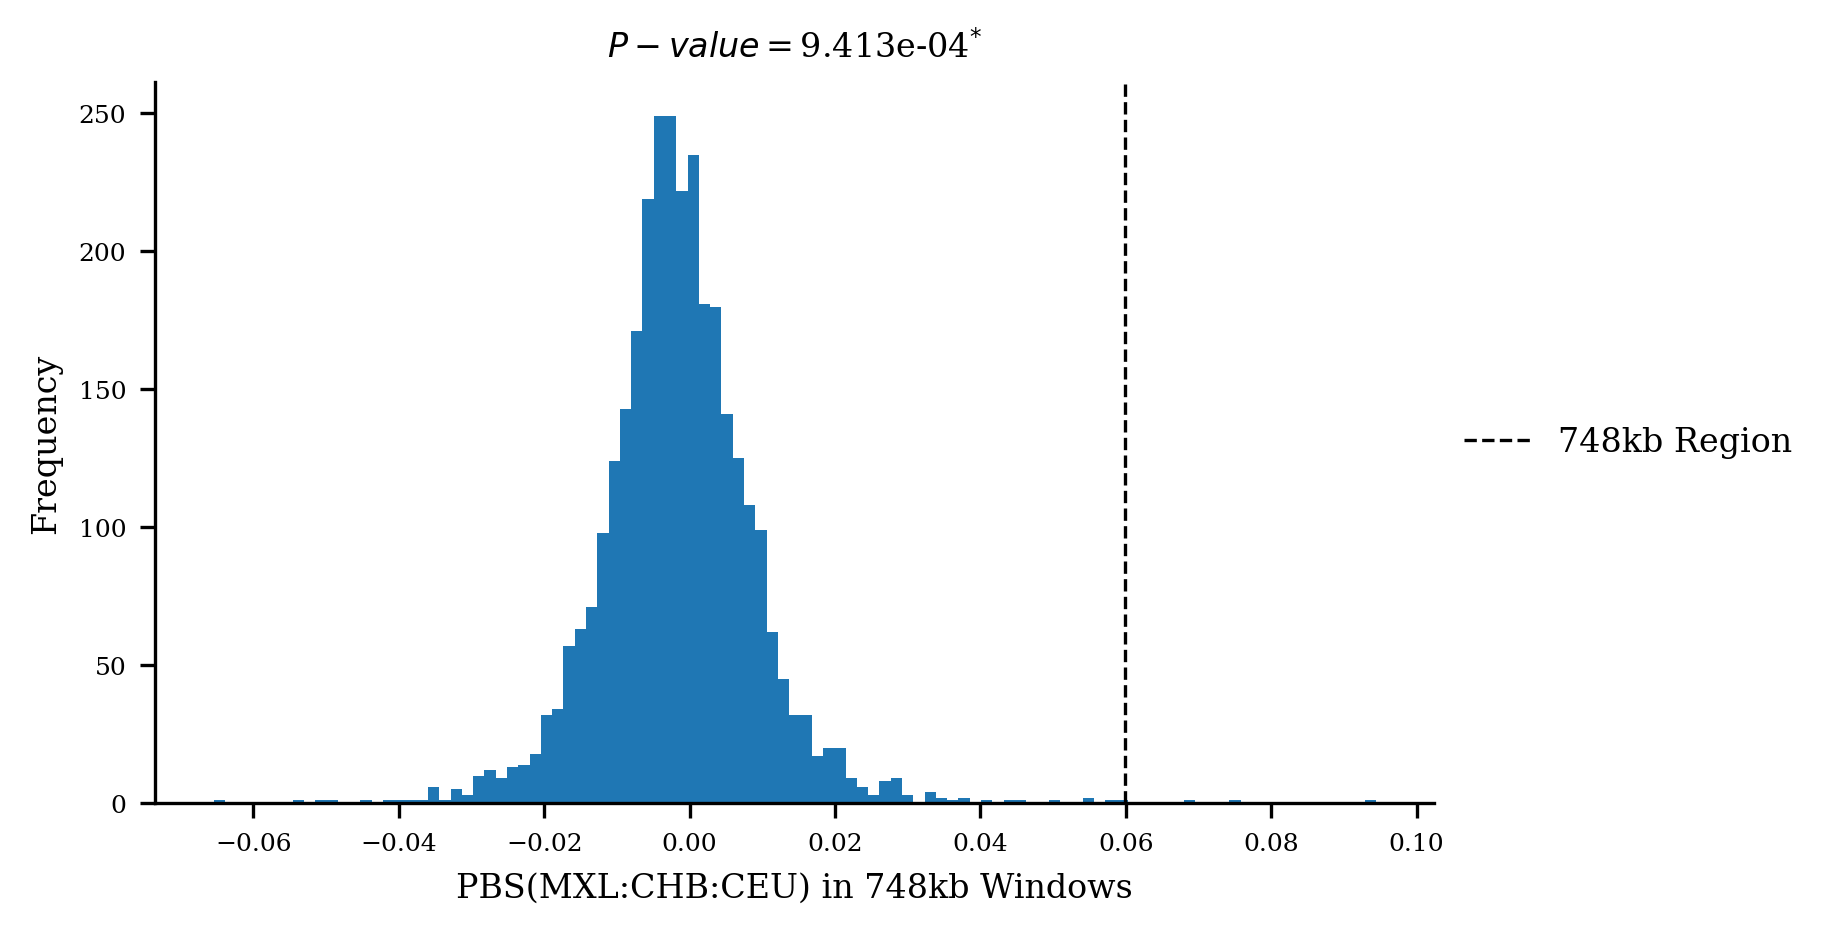

In [9]:
# Plot the distribution and determine if the windowed average PBS value is statistically significant.
af.plot_avg_pbs_winds(
    tgp_748kb_gt, pbs_idx_dicc['MXL'],
    pbs_idx_dicc['CHB'], pbs_idx_dicc['CEU'],
    '748kb Region', 748,
)

## 72kb Region

In [10]:
# Polarize the genotype matrix.
tgp_748kb_p_gt = af.polarize_gt(tgp_748kb_gt)

In [11]:
# Extract the archaic specific snps.
arc_der_dicc = af.extract_arc_der_sites(tgp_748kb_gt, tgp_748kb_pos, idx_dicc)
arc_anc_dicc = af.extract_arc_anc_sites(tgp_748kb_gt, tgp_748kb_pos, idx_dicc)
# Intialize a dictionary to store joint masks.
arc_dicc = {'DEN': {}, 'NEA': {}}
# For each archaic...
for key in arc_dicc.keys():
    # Fille the dictionary.
    arc_dicc[key]['MASK'] = arc_der_dicc[key]['MASK'] | arc_anc_dicc[key]['MASK']

In [12]:
# Complile a dataframe of PBS for the Denisovan-specific sites.
mxl_den_pbs_dicc = {
    'Position': tgp_748kb_pos[arc_dicc['DEN']['MASK']],
    'All MXL Inds.': mxl_pop_pbs[arc_dicc['DEN']['MASK']],
    'Indigenous American Anc. Inds.': mxl_nat_pbs[arc_dicc['DEN']['MASK']],
    'Non-Indigenous American Anc. Inds.': mxl_not_pbs[arc_dicc['DEN']['MASK']],
}
# Convert the dictionary into a dataframe.
mxl_den_pbs_df = pd.DataFrame(mxl_den_pbs_dicc)
# Extract the positions and find the target indicies for the 72kb region.
den_hap_idx = np.where(
    (40758000 <= mxl_den_pbs_dicc['Position']) & (mxl_den_pbs_dicc['Position'] <= 40830000)
)[0]
# Subset the 72kb region.
mxl_den_hap_pbs_df = mxl_den_pbs_df.iloc[den_hap_idx]

In [13]:
# Mask the polarized genotype matrix for the Denisovan-specific sites.
den_p_gt = tgp_748kb_p_gt.compress(arc_dicc['DEN']['MASK'], axis=0)
# Intialize a dictionary to store the derived allele frequency arrays.
den_freq_dicc = {
    'Position': tgp_748kb_pos[arc_dicc['DEN']['MASK']],
}
# For every population...
for pop in arc_list+tgp_pop_list:
    # Fill the dictionary
    den_freq_dicc[pop] = af.calc_alt_freqs(den_p_gt.take(idx_dicc[pop], axis=1))
# Convert the dictionary into a dataframe.
den_freq_df = pd.DataFrame(den_freq_dicc)
# Extract the positions and find the target indicies for the 72kb region.
den_hap_idx = np.where(
    (40758000 <= den_freq_dicc['Position']) & (den_freq_dicc['Position'] <= 40830000)
)[0]
# Subset the 72kb region.
den_hap_freq_df = den_freq_df.iloc[den_hap_idx]

In [14]:
# Show the PBS values for the Denisovan-specific SNPs in the 72kb region.
mxl_den_hap_pbs_df

,Position,All MXL Inds.,Indigenous American Anc. Inds.,Non-Indigenous American Anc. Inds.
5,40788647,0.279487,0.405784,0.175496
6,40789962,0.279487,0.405784,0.175496
7,40790924,0.279487,0.405784,0.175496
8,40791702,NaN,NaN,NaN
9,40791852,0.279487,0.405784,0.175496
10,40792197,0.279487,0.405784,0.175496
11,40792300,0.279487,0.405784,0.175496
12,40792703,0.279487,0.405784,0.175496
13,40792856,0.279487,0.405784,0.175496
14,40793515,0.279487,0.405784,0.175496


In [15]:
# Show the derived allele frequencies for the Denisovan-specific SNPs in the 72kb region.
den_hap_freq_df

,Position,DEN,ALT,CHA,VIN,LWK,GWD,MSL,ESN,YRI,BEB,STU,ITU,PJL,GIH,CHB,KHV,CHS,JPT,CDX,TSI,CEU,IBS,GBR,FIN,PEL,MXL,CLM,PUR
5,40788647,0.0,1.0,0.5,0.5,1.000000,1.000000,1.000000,1.000000,1.00000,0.843023,0.887255,0.892157,0.947917,0.902913,0.966019,0.914141,0.961905,0.971154,0.876344,0.948598,0.984848,0.967290,0.994505,0.994949,0.782353,0.695312,0.925532,0.913462
6,40789962,1.0,0.0,0.5,0.5,0.000000,0.008850,0.000000,0.000000,0.00000,0.156977,0.112745,0.107843,0.052083,0.097087,0.033981,0.085859,0.038095,0.028846,0.123656,0.051402,0.015152,0.032710,0.005495,0.005051,0.217647,0.304688,0.074468,0.086538
7,40790924,0.0,1.0,0.5,0.5,1.000000,1.000000,1.000000,1.000000,0.99537,0.843023,0.887255,0.892157,0.947917,0.902913,0.966019,0.914141,0.961905,0.971154,0.876344,0.948598,0.984848,0.967290,0.994505,0.994949,0.782353,0.695312,0.925532,0.913462
8,40791702,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,40791852,0.0,1.0,0.5,0.5,1.000000,1.000000,1.000000,1.000000,0.99537,0.843023,0.887255,0.892157,0.947917,0.902913,0.966019,0.914141,0.961905,0.971154,0.876344,0.948598,0.984848,0.967290,0.994505,0.994949,0.782353,0.695312,0.925532,0.913462
10,40792197,0.0,1.0,0.5,0.5,1.000000,1.000000,1.000000,1.000000,1.00000,0.843023,0.887255,0.892157,0.947917,0.902913,0.966019,0.914141,0.961905,0.971154,0.876344,0.948598,0.984848,0.967290,0.994505,0.994949,0.782353,0.695312,0.925532,0.913462
11,40792300,0.0,1.0,0.5,0.5,1.000000,1.000000,1.000000,1.000000,1.00000,0.843023,0.887255,0.892157,0.947917,0.902913,0.966019,0.914141,0.961905,0.971154,0.876344,0.948598,0.984848,0.967290,0.994505,0.994949,0.782353,0.695312,0.925532,0.913462
12,40792703,0.0,1.0,0.5,0.5,1.000000,1.000000,1.000000,1.000000,0.99537,0.843023,0.887255,0.892157,0.947917,0.902913,0.966019,0.914141,0.961905,0.971154,0.876344,0.948598,0.984848,0.967290,0.994505,0.994949,0.782353,0.695312,0.925532,0.913462
13,40792856,1.0,0.0,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.00000,0.156977,0.112745,0.107843,0.062500,0.097087,0.033981,0.085859,0.038095,0.028846,0.123656,0.051402,0.015152,0.032710,0.005495,0.005051,0.217647,0.304688,0.074468,0.086538
14,40793515,1.0,0.0,0.5,0.5,0.000000,0.000000,0.005882,0.000000,0.00000,0.156977,0.112745,0.107843,0.052083,0.097087,0.033981,0.085859,0.038095,0.028846,0.123656,0.051402,0.015152,0.032710,0.005495,0.005051,0.217647,0.304688,0.074468,0.086538


In [16]:
# Intialize the undefined PBS positions.
pbs_nan_sites = np.array([40791702, 40820354])
# Determine the indicies for sanity checks.
pbs_nan_idx = np.in1d(mxl_den_hap_pbs_df['Position'].values, pbs_nan_sites)
freq_nan_idx = np.in1d(den_hap_freq_df['Position'].values, pbs_nan_sites)

In [17]:
# Sanity check PBS.
mxl_den_hap_pbs_df.iloc[pbs_nan_idx]

,Position,All MXL Inds.,Indigenous American Anc. Inds.,Non-Indigenous American Anc. Inds.
8,40791702,NaN,NaN,NaN
110,40820354,NaN,NaN,NaN


In [18]:
# Sanity check the derievd allele frequencies to see if they explain the Nan values.
den_hap_freq_df.iloc[freq_nan_idx][['Position','MXL', 'CHB', 'CEU']]

,Position,MXL,CHB,CEU
8,40791702,0.0,0.0,0.0
110,40820354,0.0,0.0,0.0


## Empirical Values for SLiMulations

In [19]:
# Load the PBS values for every Denisovan-specific SNP in the genome.
den_pbs_genome = af.load_den_sites_pbs_chromosomes()

In [20]:
# Print the significance threshold for the SLIMulations.
print('All SNPs Significance Threshold:', np.nanpercentile(mxl_pop_pbs_genome, 99))
print('Denisovan-specific SNPs Significance Threshold:', np.nanpercentile(den_pbs_genome, 99))

All SNPs Significance Threshold: 0.1408079128199867
Denisovan-specific SNPs Significance Threshold: 0.27948744669683


In [21]:
# Load the rate maps for SLIMulations.
slim_rec_map = np.loadtxt(
    f'../meta_data/slimulations_recomb_rate.bed.gz', delimiter='\t',
)
slim_mut_map = np.loadtxt(
    f'../meta_data/slimulations_subst_rate.bed.gz', delimiter='\t',
)

In [22]:
# Print the mean recombination and mutation rate for SLIMulations.
print(f'Mean r: {slim_rec_map.mean(axis=0)[-1]}')
print(f'Mean mu: {slim_mut_map.mean(axis=0)[-1]}')

Mean r: 2.5453451830985906e-09
Mean mu: 1.3763111111111113e-08
